In [1]:
# 라이브러리 임포트
import os
import pandas as pd
import chardet

# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기

import time

import ExcelFile_Merge as em
import ExcelFile_Read as er
import ExcelFile_EDA as ee

### 행정동 코드 가져오기

In [4]:
# '행정동' 조인
start_time = time.time()
filepath = 'G:\\내 드라이브\\DataSet\\_최종 병합 파일\\서울 생활이동\\'
filename = '서울생활이동데이터_행정동코드_20210907'
path = filepath + filename + '.csv'
df_dong = pd.read_csv(path, low_memory=False)
df_dong.rename(columns = {'name' : '읍면동명'}, inplace = True)
df_dong = df_dong[['시도', '시군구', '읍면동', '읍면동명']]
print("read_csv(" + filename + ") time :", time.time() - start_time)

read_csv(서울생활이동데이터_행정동코드_20210907) time : 0.0246579647064209


In [6]:
df_dong.head()

,시도,시군구,읍면동,읍면동명
0,11000,11010,1101053,사직동
1,11000,11010,1101054,삼청동
2,11000,11010,1101055,부암동
3,11000,11010,1101056,평창동
4,11000,11010,1101057,무악동


### 자치구 코드 가져오기

In [9]:
start_time = time.time()
filepath = 'G:\\내 드라이브\\DataSet\\_최종 병합 파일\\서울 생활이동\\'
filename = '서울생활이동데이터_자치구코드_20210907'
path = filepath + filename + '.csv'
df_gu = pd.read_csv(path, low_memory=False)
df_gu.rename(columns = {'name' : '시군구명', 'full name' : '시도시군구명'}, inplace = True)
df_gu = df_gu[['시도', '시군구', '시군구명', '시도시군구명']]
print("read_csv time :", time.time() - start_time)

read_csv time : 0.011507511138916016


In [11]:
df_gu.head()

,시도,시군구,시군구명,시도시군구명
0,11000,11010,종로구,서울특별시 종로구
1,11000,11020,중구,서울특별시 중구
2,11000,11030,용산구,서울특별시 용산구
3,11000,11040,성동구,서울특별시 성동구
4,11000,11050,광진구,서울특별시 광진구


### 행정도+자치구 합치기

In [14]:
df_dong_gu = pd.merge(left = df_dong , right = df_gu, how = "left", on = "시군구")
df_dong_gu.rename(columns = {'시도_x' : '시도'}, inplace = True)
df_dong_gu['시도명'] = df_dong_gu['시도시군구명'].str.split(' ').str[0]
df_dong_gu = df_dong_gu.drop(['시도_y', '시도시군구명'], axis=1)

In [16]:
del df_dong, df_gu

In [18]:
df_dong_gu = df_dong_gu[['시도', '시군구', '읍면동', '시도명', '시군구명', '읍면동명']]
df_dong_gu

,시도,시군구,읍면동,시도명,시군구명,읍면동명
0,11000,11010,1101053,서울특별시,종로구,사직동
1,11000,11010,1101054,서울특별시,종로구,삼청동
2,11000,11010,1101055,서울특별시,종로구,부암동
3,11000,11010,1101056,서울특별시,종로구,평창동
4,11000,11010,1101057,서울특별시,종로구,무악동
...,...,...,...,...,...,...
1147,35000,35000,35000,전라북도,전라북도,전라북도
1148,36000,36000,36000,전라남도,전라남도,전라남도
1149,37000,37000,37000,경상북도,경상북도,경상북도
1150,38000,38000,38000,경상남도,경상남도,경상남도


In [20]:
df_dong_gu.to_parquet('G:\\내 드라이브\\DataSet\\_최종 병합 파일\\' + '시도_시군구_읍면동' + '.parquet', index=False)

In [46]:
start_time = time.time()
df_parquet_dong_gu = pd.read_parquet('G:\\내 드라이브\\DataSet\\_최종 병합 파일\\' + '시도_시군구_읍면동' + '.parquet')
print("read_parquet time :", time.time() - start_time)

read_parquet time : 0.014762639999389648


In [48]:
df_parquet_dong_gu.head()

,시도,시군구,읍면동,시도명,시군구명,읍면동명
0,11000,11010,1101053,서울특별시,종로구,사직동
1,11000,11010,1101054,서울특별시,종로구,삼청동
2,11000,11010,1101055,서울특별시,종로구,부암동
3,11000,11010,1101056,서울특별시,종로구,평창동
4,11000,11010,1101057,서울특별시,종로구,무악동


In [26]:
df_sum = pd.DataFrame()

In [28]:
path_dateset = 'G:\\내 드라이브\\DataSet\\'
path_sub = '_최종 병합 파일\\서울 생활이동\\2024\\'
savefile = '생활이동_행정동_2024_출퇴근_3060'

---
### 생활이동_행정동_2024 데이터 가공 (나이 : 20 ~ 60)

In [ ]:
path = path_dateset + path_sub
print('path : ', path)

# 파일 경로명 변경
file_list = os.listdir(path)
file_lists = [file for file in file_list if file.endswith((".csv", ".xlsx"))]
file_lists.sort()
print('file_lists : \n', '\n '.join(file_lists))
print('===========================================')

for _, filename in enumerate(file_lists):
    try:
        print('filename : ', filename + ', encoding : ', em.Get_ExcelEncoding(path + filename))
        start_time_full = time.time()

        # 서울 생활이동 데이터 불러오기
        start_time = time.time()
        print('path + filename : ', path + filename)

        dtype={'이동인구(합)': 'object', '평균 이동 시간(분)': 'float64'}
        dask = er.Read_dask(path + filename, dtype)

        print("Read_dask(" + filename + ") time :", time.time() - start_time)

        from dask.diagnostics import ProgressBar
        from time import sleep
        pbar = ProgressBar()
        pbar.register()
        start_time = time.time()
        df_dask_rtn = dask.compute()
        del dask  # 메모리 정리
        print("compute time(" + filename + ") :", time.time() - start_time)

        # 필요한 조건 설정
        start_time = time.time()
        cond1 = df_dask_rtn['요일'].isin(['월', '화', '수', '목', '금'])
        cond2 = df_dask_rtn['나이'].isin([20, 25, 30, 35, 40, 45, 50, 55, 60])   # 20 ~ 60
        cond3 = (df_dask_rtn['이동유형'].isin(['HW', 'EW']) | df_dask_rtn['이동유형'].isin(['WH', 'EH']))
        cond4 = (df_dask_rtn['도착시간'].isin([7, 8, 9]) | df_dask_rtn['도착시간'].isin([17, 18, 19]))
        df_dask_rtn = df_dask_rtn[cond1 & cond2 & cond3 & cond4]
        print("search Condition(" + filename + ") :", time.time() - start_time)

        # '이동인구(합)' 컬럼 float형으로 변경
        df_dask_rtn.loc[df_dask_rtn['이동인구(합)'] == '*','이동인구(합)'] = '0'
        df_dask_rtn = df_dask_rtn.astype({ '이동인구(합)' : 'float' })

        # 출퇴근 컬럼 추가
        df_dask_rtn.loc[(df_dask_rtn['이동유형'].isin(['HW', 'EW']))&(df_dask_rtn['도착시간'].isin([7, 8, 9])),'출퇴근'] = '출근'
        df_dask_rtn.loc[(df_dask_rtn['이동유형'].isin(['WH', 'EH']))&(df_dask_rtn['도착시간'].isin([17, 18, 19])),'출퇴근'] = '퇴근'
        df_dask_rtn = df_dask_rtn[~df_dask_rtn['출퇴근'].isnull()]

        # '대상연월', '도착 행정동 코드', '출퇴근' 기준으로, '이동인구(합)'의 계 구함
        start_time = time.time()
        df_dask_rtn = df_dask_rtn.groupby(['대상연월', '출발 행정동 코드', '도착 행정동 코드', '출퇴근'])['이동인구(합)'].sum().reset_index()
        print("groupby time :", time.time() - start_time)

        df_dask_rtn.rename(columns = {"도착 행정동 코드": "읍면동"}, inplace = True)
        df_dask_rtn = pd.merge(left = df_dask_rtn , right = df_dong_gu, how = "left", on = "읍면동")

        print("=============================================================")
        print('df_dask_rtn shape : ', df_dask_rtn.shape)
        print("Read full time :", time.time() - start_time_full)

        df_sum = pd.concat([df_dask_rtn, df_sum], axis = 0)
        del df_dask_rtn  # 메모리 정리
    except:
        print('- Err : ', filename)

df_sum.to_parquet(path + savefile + '.parquet', index=False)

path :  G:\내 드라이브\DataSet\_최종 병합 파일\서울 생활이동\2024\
file_lists : 
 생활이동_행정동_2024.01.csv
 생활이동_행정동_2024.02.csv
 생활이동_행정동_2024.03.csv
 생활이동_행정동_2024.04.csv
 생활이동_행정동_2024.05.csv
 생활이동_행정동_2024.06.csv
 생활이동_행정동_2024.07.csv
 생활이동_행정동_2024.08.csv
 생활이동_행정동_2024.09.csv
filename :  생활이동_행정동_2024.01.csv, encoding :  utf-8
path + filename :  G:\내 드라이브\DataSet\_최종 병합 파일\서울 생활이동\2024\생활이동_행정동_2024.01.csv
Read_dask(생활이동_행정동_2024.01.csv) time : 0.8942508697509766
[########################################] | 100% Completed | 61.14 s
compute time(생활이동_행정동_2024.01.csv) : 61.47377252578735
search Condition(생활이동_행정동_2024.01.csv) : 11.984657764434814
groupby time : 2.3513143062591553
df_dask_rtn shape :  (799571, 10)
Read full time : 84.22588443756104
filename :  생활이동_행정동_2024.02.csv, encoding :  GB2312
path + filename :  G:\내 드라이브\DataSet\_최종 병합 파일\서울 생활이동\2024\생활이동_행정동_2024.02.csv
Read_dask(생활이동_행정동_2024.02.csv) time : 0.16065764427185059
[########################################] | 100% Completed | 118.

### 생활이동_행정동_2024 데이터 가공 (나이 : 30 ~ 60)

In [30]:
path = path_dateset + path_sub
print('path : ', path)

# 파일 경로명 변경
file_list = os.listdir(path)
file_lists = [file for file in file_list if file.endswith((".csv", ".xlsx"))]
file_lists.sort()
print('file_lists : \n', '\n '.join(file_lists))
print('===========================================')

for _, filename in enumerate(file_lists):
    try:
        print('filename : ', filename + ', encoding : ', em.Get_ExcelEncoding(path + filename))
        start_time_full = time.time()

        # 서울 생활이동 데이터 불러오기
        start_time = time.time()
        print('path + filename : ', path + filename)

        dtype={'이동인구(합)': 'object', '평균 이동 시간(분)': 'float64'}
        dask = er.Read_dask(path + filename, dtype)

        print("Read_dask(" + filename + ") time :", time.time() - start_time)

        from dask.diagnostics import ProgressBar
        from time import sleep
        pbar = ProgressBar()
        pbar.register()
        start_time = time.time()
        df_dask_rtn = dask.compute()
        del dask  # 메모리 정리
        print("compute time(" + filename + ") :", time.time() - start_time)

        # 필요한 조건 설정
        start_time = time.time()
        cond1 = df_dask_rtn['요일'].isin(['월', '화', '수', '목', '금'])
        cond2 = df_dask_rtn['나이'].isin([30, 35, 40, 45, 50, 55, 60])   # 30 ~ 60
        cond3 = (df_dask_rtn['이동유형'].isin(['HW', 'EW']) | df_dask_rtn['이동유형'].isin(['WH', 'EH']))
        cond4 = (df_dask_rtn['도착시간'].isin([7, 8, 9]) | df_dask_rtn['도착시간'].isin([17, 18, 19]))
        df_dask_rtn = df_dask_rtn[cond1 & cond2 & cond3 & cond4]
        print("search Condition(" + filename + ") :", time.time() - start_time)

        # '이동인구(합)' 컬럼 float형으로 변경
        df_dask_rtn.loc[df_dask_rtn['이동인구(합)'] == '*','이동인구(합)'] = '0'
        df_dask_rtn = df_dask_rtn.astype({ '이동인구(합)' : 'float' })

        # 출퇴근 컬럼 추가
        df_dask_rtn.loc[(df_dask_rtn['이동유형'].isin(['HW', 'EW']))&(df_dask_rtn['도착시간'].isin([7, 8, 9])),'출퇴근'] = '출근'
        df_dask_rtn.loc[(df_dask_rtn['이동유형'].isin(['WH', 'EH']))&(df_dask_rtn['도착시간'].isin([17, 18, 19])),'출퇴근'] = '퇴근'
        df_dask_rtn = df_dask_rtn[~df_dask_rtn['출퇴근'].isnull()]

        # '대상연월', '도착 행정동 코드', '출퇴근' 기준으로, '이동인구(합)'의 계 구함
        start_time = time.time()
        df_dask_rtn = df_dask_rtn.groupby(['대상연월', '출발 행정동 코드', '도착 행정동 코드', '출퇴근'])['이동인구(합)'].sum().reset_index()
        print("groupby time :", time.time() - start_time)

        print("=============================================================")
        print('df_dask_rtn shape : ', df_dask_rtn.shape)
        print("Read full time :", time.time() - start_time_full)

        df_sum = pd.concat([df_dask_rtn, df_sum], axis = 0)
        del df_dask_rtn  # 메모리 정리
    except:
        print('- Err : ', filename)

df_sum.to_parquet(path + savefile + '.parquet', index=False)

path :  G:\내 드라이브\DataSet\_최종 병합 파일\서울 생활이동\2024\
file_lists : 
 생활이동_행정동_2024.01.csv
 생활이동_행정동_2024.02.csv
 생활이동_행정동_2024.03.csv
 생활이동_행정동_2024.04.csv
 생활이동_행정동_2024.05.csv
 생활이동_행정동_2024.06.csv
 생활이동_행정동_2024.07.csv
 생활이동_행정동_2024.08.csv
 생활이동_행정동_2024.09.csv
filename :  생활이동_행정동_2024.01.csv, encoding :  utf-8
path + filename :  G:\내 드라이브\DataSet\_최종 병합 파일\서울 생활이동\2024\생활이동_행정동_2024.01.csv
Read_dask(생활이동_행정동_2024.01.csv) time : 1.5295894145965576
[########################################] | 100% Completed | 62.51 s
compute time(생활이동_행정동_2024.01.csv) : 63.02587866783142
search Condition(생활이동_행정동_2024.01.csv) : 11.374377012252808
groupby time : 1.78239107131958
df_dask_rtn shape :  (744790, 5)
Read full time : 83.70068383216858
filename :  생활이동_행정동_2024.02.csv, encoding :  GB2312
path + filename :  G:\내 드라이브\DataSet\_최종 병합 파일\서울 생활이동\2024\생활이동_행정동_2024.02.csv
Read_dask(생활이동_행정동_2024.02.csv) time : 0.07814860343933105
[########################################] | 100% Completed | 116.03 

In [80]:
start_time = time.time()
filepath = 'G:\\내 드라이브\\DataSet\\_최종 병합 파일\\서울 생활이동\\2024\\'
filename = '생활이동_행정동_2024_출퇴근_3060'
df_parquet = pd.read_parquet(filepath + filename + '.parquet')
print("read_parquet time :", time.time() - start_time)

read_parquet time : 0.34215211868286133


In [82]:
df_parquet.shape

(5968903, 5)

In [84]:
df_parquet.head()

,대상연월,출발 행정동 코드,도착 행정동 코드,출퇴근,이동인구(합)
0,202408,21000,1101053,출근,25.58
1,202408,21000,1101053,퇴근,21.48
2,202408,21000,1101054,출근,6.54
3,202408,21000,1101054,퇴근,12.10
4,202408,21000,1101055,퇴근,6.70


In [86]:
df_parquet_1 = df_parquet[df_parquet['출퇴근'] == '출근']
df_parquet_2 = df_parquet[df_parquet['출퇴근'] == '퇴근']
print(df_parquet_1.shape, df_parquet_2.shape)

(2312539, 5) (3656364, 5)


In [88]:
df_1_sort_group_top10 = df_parquet_1.sort_values(by="이동인구(합)", ascending=False).groupby("대상연월").head(10)
df_2_sort_group_top10 = df_parquet_2.sort_values(by="이동인구(합)", ascending=False).groupby("대상연월").head(10)

In [89]:
print(df_1_sort_group_top10.shape)
print(df_2_sort_group_top10.shape)

(80, 5)
(80, 5)


In [92]:
df_1_sort_group_top10.head()

,대상연월,출발 행정동 코드,도착 행정동 코드,출퇴근,이동인구(합)
1068209,202407,1119054,1119054,출근,52418.24
3319554,202404,1119054,1119054,출근,46732.87
2554770,202405,1119054,1119054,출근,45691.50
4072287,202403,1119054,1119054,출근,45686.02
323077,202408,1119054,1119054,출근,45442.74


In [94]:
df_2_sort_group_top10.head()

,대상연월,출발 행정동 코드,도착 행정동 코드,출퇴근,이동인구(합)
1068210,202407,1119054,1119054,퇴근,46604.28
3319555,202404,1119054,1119054,퇴근,44690.04
2554771,202405,1119054,1119054,퇴근,44126.09
323078,202408,1119054,1119054,퇴근,42678.11
5549258,202401,1119054,1119054,퇴근,42392.71


In [96]:
df_1_sort_group_top10.rename(columns = {'도착 행정동 코드' : '읍면동'}, inplace = True)   # 출근
df_2_sort_group_top10.rename(columns = {'출발 행정동 코드' : '읍면동'}, inplace = True)   # 퇴근

In [98]:
df_1_sort_group_top10.head(1)

,대상연월,출발 행정동 코드,읍면동,출퇴근,이동인구(합)
1068209,202407,1119054,1119054,출근,52418.24


In [100]:
df_2_sort_group_top10.head(1)

,대상연월,읍면동,도착 행정동 코드,출퇴근,이동인구(합)
1068210,202407,1119054,1119054,퇴근,46604.28


---
### 데이터 시각화

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# 패키지 임포트
import numpy as np                  # Numpy(넘파이) 패키지 임포트
import pandas as pd                 # pandas(판다스) 패키지 임포트
import matplotlib.pyplot as plt     # Matplotlib(맷플롯립) 패키지의 pyplot모듈을 plt로 임포트
from matplotlib import rcParams     # 한글 환경 설정을 위한 rcParams 임포트
import seaborn as sns               # seaborn(씨본) 패키지 임포트
import warnings

# 한글 환경 설정
def setting_styles_basic():
  rcParams['font.family'] = 'Malgun Gothic'     # Window
  #rcParams['font.family'] = 'NanumBarunGothic'    # Window
  # rcParams['font.family'] = 'AppleGothic'       # Max

  rcParams['axes.unicode_minus'] = False

setting_styles_basic()

# 경고창 무시
warnings.filterwarnings('ignore')

In [54]:
# 그래프의 스케일(scale)조정
sns.set_context('paper', # notebook, talk, poster
                rc = {
                    'font.size' : 10,
                    'xtick.labelsize' : 10,
                    'ytick.labelsize' : 10,
                    'axes.labelsize' : 10
                })

---
## 출/퇴근 많은 곳 확인
- 출근 : 07,08,09 시 - 도착지
- 퇴근 : 17,18,19 시 - 출발지

#### 시각화_출근

In [102]:
filtered = ['대상연월', '읍면동', '출퇴근', '이동인구(합)']
df_1_sort_group_top10 = df_1_sort_group_top10[filtered]
df_1_sort_group_top10 = pd.merge(left = df_1_sort_group_top10 , right = df_parquet_dong_gu, how = "left", on = "읍면동")
df_1_sort_group_top10

,대상연월,읍면동,출퇴근,이동인구(합),시도,시군구,시도명,시군구명,읍면동명
0,202407,1119054,출근,52418.24,11000,11190,서울특별시,영등포구,여의동
1,202404,1119054,출근,46732.87,11000,11190,서울특별시,영등포구,여의동
2,202405,1119054,출근,45691.50,11000,11190,서울특별시,영등포구,여의동
3,202403,1119054,출근,45686.02,11000,11190,서울특별시,영등포구,여의동
4,202408,1119054,출근,45442.74,11000,11190,서울특별시,영등포구,여의동
...,...,...,...,...,...,...,...,...,...
75,202402,1119054,출근,14878.79,11000,11190,서울특별시,영등포구,여의동
76,202406,1119054,출근,14865.48,11000,11190,서울특별시,영등포구,여의동
77,202401,1119054,출근,14802.17,11000,11190,서울특별시,영등포구,여의동
78,202402,1116064,출근,14020.60,11000,11160,서울특별시,강서구,가양1동


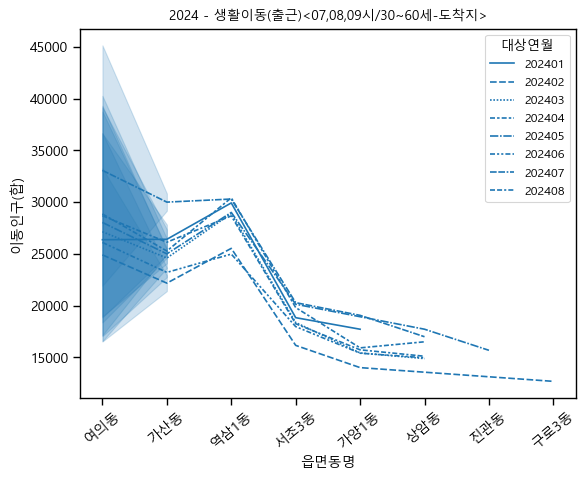

In [118]:
plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # y축(지수표시) - 일반 표시로 변경
sns.lineplot(data = df_1_sort_group_top10, x = '읍면동명', y = '이동인구(합)', style = '대상연월')
plt.title('2024 - 생활이동(출근)<07,08,09시/30~60세-도착지>')
plt.xticks(rotation=40);

#### 시각화_퇴근

In [106]:
filtered = ['대상연월', '읍면동', '출퇴근', '이동인구(합)']
df_2_sort_group_top10.rename(columns = {"출발 행정동 코드": "읍면동"}, inplace = True)
df_2_sort_group_top10 = df_2_sort_group_top10[filtered]
df_2_sort_group_top10 = pd.merge(left = df_2_sort_group_top10 , right = df_parquet_dong_gu, how = "left", on = "읍면동")
df_2_sort_group_top10

,대상연월,읍면동,출퇴근,이동인구(합),시도,시군구,시도명,시군구명,읍면동명
0,202407,1119054,퇴근,46604.28,11000,11190,서울특별시,영등포구,여의동
1,202404,1119054,퇴근,44690.04,11000,11190,서울특별시,영등포구,여의동
2,202405,1119054,퇴근,44126.09,11000,11190,서울특별시,영등포구,여의동
3,202408,1119054,퇴근,42678.11,11000,11190,서울특별시,영등포구,여의동
4,202401,1119054,퇴근,42392.71,11000,11190,서울특별시,영등포구,여의동
...,...,...,...,...,...,...,...,...,...
75,202406,1114074,퇴근,17030.45,11000,11140,서울특별시,마포구,상암동
76,202402,1114074,퇴근,16755.82,11000,11140,서울특별시,마포구,상암동
77,202403,1125052,퇴근,16392.77,11000,11250,서울특별시,강동구,상일동
78,202406,1125051,퇴근,15747.13,11000,11250,서울특별시,강동구,강일동


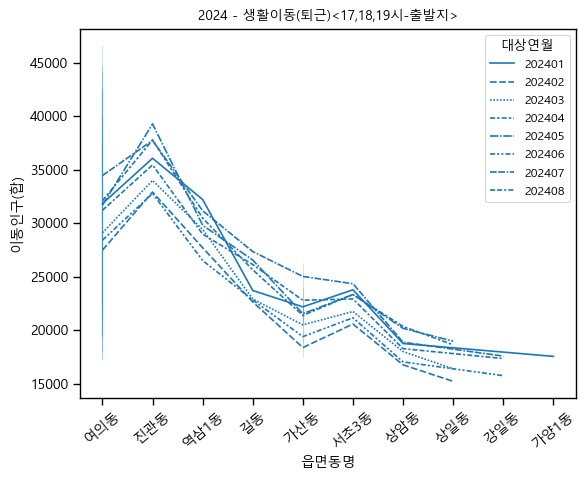

In [110]:
sns.lineplot(data = df_2_sort_group_top10, x = '읍면동명', y = '이동인구(합)', style = '대상연월')
plt.title('2024 - 생활이동(퇴근)<17,18,19시/30~60세-출발지>')
plt.xticks(rotation=40);